In [1]:
#!pip install prettytable
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
#!pip install spacy


### STEPS OF PREPROCESSING
#### tokenisation ------> stemming--------> Lemmatization----->POS tag(part of speech tag)----> Name_entity_recognition-----> Chunking


In [2]:
import spacy
from spacy import displacy
from prettytable import PrettyTable
import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
from prettytable import PrettyTable

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
text = "Hello KGP Talkie! Let's learn NLP together. I am 20."

doc = nlp(text)

In [6]:
# doc.to_dict()
#doc.text()
for token in doc:
    print(token.text, token.is_alpha, token.is_punct, token.like_num)


Hello True False False
KGP True False False
Talkie True False False
! False True False
Let True False False
's False False False
learn True False False
NLP True False False
together True False False
. False True False
I True False False
am True False False
20 False False True
. False True False


In [7]:
table = PrettyTable()
table.field_names = [" token", "is_alpha","punctuation ", "numerical ","lower"]
for token in doc:
    table.add_row([token.text, token.is_alpha, token.is_punct, token.like_num, token.is_lower])
print(table)

+----------+----------+--------------+------------+-------+
|   token  | is_alpha | punctuation  | numerical  | lower |
+----------+----------+--------------+------------+-------+
|  Hello   |   True   |    False     |   False    | False |
|   KGP    |   True   |    False     |   False    | False |
|  Talkie  |   True   |    False     |   False    | False |
|    !     |  False   |     True     |   False    | False |
|   Let    |   True   |    False     |   False    | False |
|    's    |  False   |    False     |   False    |  True |
|  learn   |   True   |    False     |   False    |  True |
|   NLP    |   True   |    False     |   False    | False |
| together |   True   |    False     |   False    |  True |
|    .     |  False   |     True     |   False    | False |
|    I     |   True   |    False     |   False    | False |
|    am    |   True   |    False     |   False    |  True |
|    20    |  False   |    False     |    True    | False |
|    .     |  False   |     True     |  

In [8]:
doc

Hello KGP Talkie! Let's learn NLP together. I am 20.

In [9]:
table = PrettyTable()
table.field_names = ["tokens" , "POS" , "Detail" , "explanation"]
for token in doc:
    table.add_row([token.text, token.pos_ , token.tag_ , spacy.explain(token.tag_)])
print(table)

+----------+-------+--------+---------------------------------------+
|  tokens  |  POS  | Detail |              explanation              |
+----------+-------+--------+---------------------------------------+
|  Hello   |  INTJ |   UH   |              interjection             |
|   KGP    | PROPN |  NNP   |         noun, proper singular         |
|  Talkie  | PROPN |  NNP   |         noun, proper singular         |
|    !     | PUNCT |   .    |   punctuation mark, sentence closer   |
|   Let    |  VERB |   VB   |            verb, base form            |
|    's    |  PRON |  PRP   |           pronoun, personal           |
|  learn   |  VERB |   VB   |            verb, base form            |
|   NLP    | PROPN |  NNP   |         noun, proper singular         |
| together |  ADV  |   RB   |                 adverb                |
|    .     | PUNCT |   .    |   punctuation mark, sentence closer   |
|    I     |  PRON |  PRP   |           pronoun, personal           |
|    am    |  AUX  |

### 3. **Dependency Parsing**


In [10]:
text = 'The dead air shaped the dead darkness, further away than seeing shapes the dead earth.'
doc = nlp(text)

table = PrettyTable()
table.add_fields = ["token","Dep","head text ", "head_pos","children"]

for token in doc:
    children = [child.text for child in token.children]
    table.add_row([token.text , token.dep_ , token.head.text , token.head.pos_ , children])
print(table)

+----------+---------+----------+---------+---------------------------------------+
| Field 1  | Field 2 | Field 3  | Field 4 |                Field 5                |
+----------+---------+----------+---------+---------------------------------------+
|   The    |   det   |   air    |   NOUN  |                   []                  |
|   dead   |   amod  |   air    |   NOUN  |                   []                  |
|   air    |  nsubj  |  shaped  |   VERB  |            ['The', 'dead']            |
|  shaped  |   ROOT  |  shaped  |   VERB  | ['air', 'darkness', ',', 'away', '.'] |
|   the    |   det   | darkness |   NOUN  |                   []                  |
|   dead   |   amod  | darkness |   NOUN  |                   []                  |
| darkness |   dobj  |  shaped  |   VERB  |            ['the', 'dead']            |
|    ,     |  punct  |  shaped  |   VERB  |                   []                  |
| further  |  advmod |   away   |   ADV   |                   []            

In [11]:
displacy.render(doc , style = 'dep' , jupyter = True , options={'distance':60})

In [12]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120, 'compact': True, 'bg': '#09a3d3', 'color': '#ffffff'})

### LEMMATIZATION ###

In [13]:
text = "laugh laughing laughfter"
doc = nlp(text)

table = PrettyTable()
table.add_fields = ["token","lemma"]

for token in doc:
    table.add_row([token.text , token.lemma_])
print(table)

+-----------+-----------+
|  Field 1  |  Field 2  |
+-----------+-----------+
|   laugh   |   laugh   |
|  laughing |   laugh   |
| laughfter | laughfter |
+-----------+-----------+


In [14]:
text = 'The scientists discover new species every year, Last year, they discovered an ancient artifact. They are discovering new techniques with their recent discovery'
doc = nlp(text)

table = PrettyTable()
table.add_fields = ["token","lemma","pos_tag"]

for token in doc:
    table.add_row([token.text , token.lemma_, token.pos_])
print(table)

+-------------+-----------+---------+
|   Field 1   |  Field 2  | Field 3 |
+-------------+-----------+---------+
|     The     |    the    |   DET   |
|  scientists | scientist |   NOUN  |
|   discover  |  discover |   VERB  |
|     new     |    new    |   ADJ   |
|   species   |   specie  |   NOUN  |
|    every    |   every   |   DET   |
|     year    |    year   |   NOUN  |
|      ,      |     ,     |  PUNCT  |
|     Last    |    last   |   ADJ   |
|     year    |    year   |   NOUN  |
|      ,      |     ,     |  PUNCT  |
|     they    |    they   |   PRON  |
|  discovered |  discover |   VERB  |
|      an     |     an    |   DET   |
|   ancient   |  ancient  |   ADJ   |
|   artifact  |  artifact |   NOUN  |
|      .      |     .     |  PUNCT  |
|     They    |    they   |   PRON  |
|     are     |     be    |   AUX   |
| discovering |  discover |   VERB  |
|     new     |    new    |   ADJ   |
|  techniques | technique |   NOUN  |
|     with    |    with   |   ADP   |
|    their  

In [15]:
nlp.get_pipe("ner").labels

text = """
Evans pointed to signs of the economy slowing down, including what he called the 'deteriorating' U.S. labor market. The U.S. Labor Department reported that the unemployment rate inched to 4.3% in July to its highest since October 2021, and a gauge for U.S. manufacturing activity fell to an eight-month low in the same month.
"""

doc = nlp(text=text)

displacy.render(doc, style='ent', jupyter=True)


In [16]:
nlp = spacy.load('en_core_web_lg')

In [17]:
doc = nlp('cat')
vec1 = doc.vector
doc.vector.shape

(300,)

In [18]:
doc = nlp('dog')
vec2 = doc.vector
doc.vector.shape

(300,)

In [19]:
#!conda install scikit-learn



In [20]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity([vec1], [vec2])
print(sim)

[[0.8016855]]


In [21]:
word = ["dog", "cat" , 'man' , 'women' , "king" , "queen", "houses" ]
table = PrettyTable(field_names = ['word 1','word2',['score']])

In [22]:
from itertools import combinations

In [23]:
table = PrettyTable(field_names = ['word 1','word2',['score']])
for word1, word2 in combinations(word,2):
    token1 = nlp(word1)
    token2 = nlp(word2)

    sim = token1.similarity(token2)
    table.add_row([word1 , word2 , f"{sim:.2f}"])

print(table)

+--------+--------+-----------+
| word 1 | word2  | ['score'] |
+--------+--------+-----------+
|  dog   |  cat   |    0.80   |
|  dog   |  man   |    0.42   |
|  dog   | women  |    0.22   |
|  dog   |  king  |    0.25   |
|  dog   | queen  |    0.23   |
|  dog   | houses |    0.23   |
|  cat   |  man   |    0.36   |
|  cat   | women  |    0.19   |
|  cat   |  king  |    0.28   |
|  cat   | queen  |    0.31   |
|  cat   | houses |    0.20   |
|  man   | women  |    0.45   |
|  man   |  king  |    0.41   |
|  man   | queen  |    0.27   |
|  man   | houses |    0.24   |
| women  |  king  |    0.17   |
| women  | queen  |    0.29   |
| women  | houses |    0.27   |
|  king  | queen  |    0.73   |
|  king  | houses |    0.21   |
| queen  | houses |    0.21   |
+--------+--------+-----------+


## tokkenization

In [24]:
#!pip install nltk

In [25]:
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
from prettytable import PrettyTable

In [26]:
#nltk.download()

In [27]:
text = "Nobody is gonna hit as hard as life, but it ain’t how hard you can hit. It’s how hard you can get hit and keep moving forward. It’s how much you can take, and keep moving forward. That’s how winning is done."

words = word_tokenize(text)
sentences = sent_tokenize(text)

In [28]:
sentences

['Nobody is gonna hit as hard as life, but it ain’t how hard you can hit.',
 'It’s how hard you can get hit and keep moving forward.',
 'It’s how much you can take, and keep moving forward.',
 'That’s how winning is done.']

## filtering stop words

In [29]:
from nltk.corpus import stopwords
import spacy

In [30]:
stop_words = stopwords.words('english')

nlp = spacy.load('en_core_web_sm')
spacy_stop_words = nlp.Defaults.stop_words

In [31]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
text = " ".join(open('bert_extracted_text.txt', encoding='utf-8').read().splitlines())

In [33]:
words = word_tokenize(text.lower())

In [34]:
sw_len = set([word for word in words if word in stop_words])
len(sw_len)

39

## STEMMING

In [35]:
# zip function 
names = ["Alice", "Bob", "Charlie"]
ages = [25, 30, 22]

#for name, age in zip(names, ages):
 #   print(name, "is", age, "years old")

for i in range(0,3):
    print(names[i] , "is", ages[i] , "years old")

Alice is 25 years old
Bob is 30 years old
Charlie is 22 years old


In [36]:
# zip function 
names = ["Alice", "Bob", "Charlie","heatron"]
ages = [25, 30, 22, 40]

for name, age in zip(names, ages):
    print(name, "is", age, "years old")

#for i in range(0,3):
 #   print(names[i] , "is", ages[i] , "years old")

Alice is 25 years old
Bob is 30 years old
Charlie is 22 years old
heatron is 40 years old


In [37]:
from nltk.stem import PorterStemmer

In [38]:
text = 'The scientists discover new species every year, Last year, they discovered an ancient artifact. They are discovering new techniques with their recent discovery'

stemmer = PorterStemmer()
words = word_tokenize(text)

stemmed_words = [stemmer.stem(word) for word in words]

table = PrettyTable()
table.field_names = ["words", "Stemmed words"]

for word, stw in zip(words,stemmed_words):
    table.add_row([word,stw])

print(table)

+-------------+---------------+
|    words    | Stemmed words |
+-------------+---------------+
|     The     |      the      |
|  scientists |   scientist   |
|   discover  |     discov    |
|     new     |      new      |
|   species   |     speci     |
|    every    |     everi     |
|     year    |      year     |
|      ,      |       ,       |
|     Last    |      last     |
|     year    |      year     |
|      ,      |       ,       |
|     they    |      they     |
|  discovered |     discov    |
|      an     |       an      |
|   ancient   |    ancient    |
|   artifact  |    artifact   |
|      .      |       .       |
|     They    |      they     |
|     are     |      are      |
| discovering |     discov    |
|     new     |      new      |
|  techniques |    techniqu   |
|     with    |      with     |
|    their    |     their     |
|    recent   |     recent    |
|  discovery  |   discoveri   |
+-------------+---------------+


## POS_TAG

In [39]:
from nltk import pos_tag

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nsubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
tagged_words = pos_tag(words)

In [42]:
table = PrettyTable(field_names=['word', 'pos tag'])

for word, pos in zip(words, tagged_words):
    table.add_row([word, pos[1]])

print(table)

+-------------+---------+
|     word    | pos tag |
+-------------+---------+
|     The     |    DT   |
|  scientists |   NNS   |
|   discover  |   VBP   |
|     new     |    JJ   |
|   species   |   NNS   |
|    every    |    DT   |
|     year    |    NN   |
|      ,      |    ,    |
|     Last    |    JJ   |
|     year    |    NN   |
|      ,      |    ,    |
|     they    |   PRP   |
|  discovered |   VBD   |
|      an     |    DT   |
|   ancient   |    JJ   |
|   artifact  |    NN   |
|      .      |    .    |
|     They    |   PRP   |
|     are     |   VBP   |
| discovering |   VBG   |
|     new     |    JJ   |
|  techniques |   NNS   |
|     with    |    IN   |
|    their    |   PRP$  |
|    recent   |    JJ   |
|  discovery  |    NN   |
+-------------+---------+


## lemmatizing

In [43]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nsubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
lemmatizer = WordNetLemmatizer()

In [45]:
words = word_tokenize(text)

In [46]:
lemma = [lemmatizer.lemmatize(word) for word in words]

In [47]:
table = PrettyTable(field_names = ["words", "stem_word", "lemma"])

for wd, st, lm in zip(words,stemmed_words, lemma):
    table.add_row([wd , st, lm])

print(table)

+-------------+-----------+-------------+
|    words    | stem_word |    lemma    |
+-------------+-----------+-------------+
|     The     |    the    |     The     |
|  scientists | scientist |  scientist  |
|   discover  |   discov  |   discover  |
|     new     |    new    |     new     |
|   species   |   speci   |    specie   |
|    every    |   everi   |    every    |
|     year    |    year   |     year    |
|      ,      |     ,     |      ,      |
|     Last    |    last   |     Last    |
|     year    |    year   |     year    |
|      ,      |     ,     |      ,      |
|     they    |    they   |     they    |
|  discovered |   discov  |  discovered |
|      an     |     an    |      an     |
|   ancient   |  ancient  |   ancient   |
|   artifact  |  artifact |   artifact  |
|      .      |     .     |      .      |
|     They    |    they   |     They    |
|     are     |    are    |     are     |
| discovering |   discov  | discovering |
|     new     |    new    |     ne

## chunking

In [48]:
from nltk.chunk import RegexpParser

text = " ".join(open('bert_extracted_text.txt',encoding='utf-8').read().splitlines())

grammar = "NP: {<DT>?<JJ>*<NN>}"

In [49]:
chunk_parser = RegexpParser(grammar)

chunks = chunk_parser.parse(tagged_words)

In [50]:
#!pip install svgling

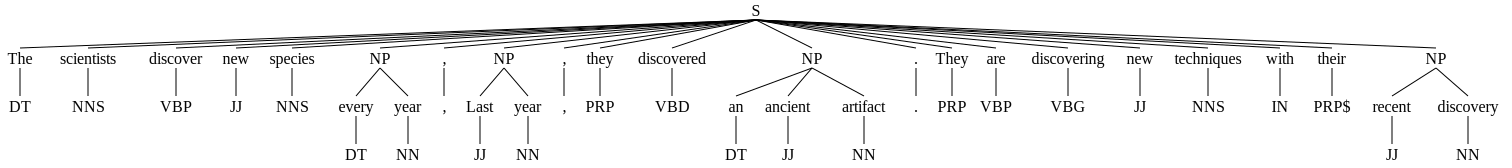

In [51]:
chunks

In [52]:
print(chunks)

(S
  The/DT
  scientists/NNS
  discover/VBP
  new/JJ
  species/NNS
  (NP every/DT year/NN)
  ,/,
  (NP Last/JJ year/NN)
  ,/,
  they/PRP
  discovered/VBD
  (NP an/DT ancient/JJ artifact/NN)
  ./.
  They/PRP
  are/VBP
  discovering/VBG
  new/JJ
  techniques/NNS
  with/IN
  their/PRP$
  (NP recent/JJ discovery/NN))


## Name entity recognition

In [53]:
from nltk.chunk import ne_chunk

In [54]:
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nsubh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\nsubh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [55]:
text = """
Evans pointed to signs of the economy slowing down, including what he called the 'deteriorating' U.S. labor market. The U.S. Labor Department reported that the unemployment rate inched to 4.3% in July to its highest since October 2021, and a gauge for U.S. manufacturing activity fell to an eight-month low in the same month.
"""

words = word_tokenize(text)

tagged_words = pos_tag(words)

In [56]:
ner_tree = ne_chunk(tagged_words)

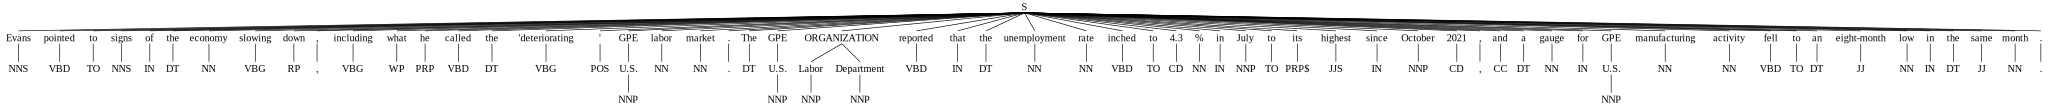

In [57]:
ner_tree

In [58]:
for ner in ner_tree:
    if hasattr(ner, 'label'):
        print(' '.join(c[0] for c in ner),":" ,ner.label())

U.S. : GPE
U.S. : GPE
Labor Department : ORGANIZATION
U.S. : GPE


In [59]:
for node in ner_tree:
    print(node, "->", hasattr(node, 'label'))


('Evans', 'NNS') -> False
('pointed', 'VBD') -> False
('to', 'TO') -> False
('signs', 'NNS') -> False
('of', 'IN') -> False
('the', 'DT') -> False
('economy', 'NN') -> False
('slowing', 'VBG') -> False
('down', 'RP') -> False
(',', ',') -> False
('including', 'VBG') -> False
('what', 'WP') -> False
('he', 'PRP') -> False
('called', 'VBD') -> False
('the', 'DT') -> False
("'deteriorating", 'VBG') -> False
("'", 'POS') -> False
(GPE U.S./NNP) -> True
('labor', 'NN') -> False
('market', 'NN') -> False
('.', '.') -> False
('The', 'DT') -> False
(GPE U.S./NNP) -> True
(ORGANIZATION Labor/NNP Department/NNP) -> True
('reported', 'VBD') -> False
('that', 'IN') -> False
('the', 'DT') -> False
('unemployment', 'NN') -> False
('rate', 'NN') -> False
('inched', 'VBD') -> False
('to', 'TO') -> False
('4.3', 'CD') -> False
('%', 'NN') -> False
('in', 'IN') -> False
('July', 'NNP') -> False
('to', 'TO') -> False
('its', 'PRP$') -> False
('highest', 'JJS') -> False
('since', 'IN') -> False
('October'

## **Finding Collocation**
Collocations are word pairs that frequently appear together.

In [60]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [61]:
text = " ".join(open('bert_extracted_text.txt', encoding='utf-8').read().splitlines())

In [62]:
bigram = BigramCollocationFinder.from_words(word_tokenize(text))

In [63]:
scores = bigram.nbest(BigramAssocMeasures.likelihood_ratio, 20)

In [64]:
scores

[('et', 'al.'),
 ('such', 'as'),
 ('al.', ','),
 ('.', 'The'),
 ('absolute', 'improvement'),
 ('point', 'absolute'),
 ('question', 'answering'),
 (',', '2018'),
 ('Encoder', 'Representations'),
 ('OpenAI', 'GPT'),
 ('Test', 'F1'),
 ('2018', ')'),
 ('Peters', 'et'),
 ('natural', 'language'),
 ('improvement', ')'),
 ('Bidirectional', 'Encoder'),
 (',', 'where'),
 ('based', 'approaches'),
 ('during', 'pre-training'),
 ('Representations', 'from')]

# Spam text classification

- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency - Inverse Document Frequency
- Text Classification

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

where, N is the total number of rows and n is the number of rows in which the word was present.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action = 'ignore')

In [18]:
x = ['which book is this', 'this is book and this is math']

In [19]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [20]:
count.toarray()

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [21]:
cv.get_feature_names_out()

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [22]:
bow = pd.DataFrame(count.toarray(), columns = cv.get_feature_names_out() )

In [23]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [24]:
#bow.index = range(1, len(bow) + 1)
#bow

In [25]:
#arr = count.toarray()

In [26]:
#div= 1/np.sum(arr[[0]])
#div2 = 1/np.sum(arr[[1]])
#div

In [27]:
#bow.iloc[0] = bow.iloc[0] * div
#bow.iloc[1] = bow.iloc[1] * div2

In [28]:
#bow

### using another variable

In [29]:
tf = bow.copy()

In [30]:
tf

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [31]:
enumerate(tf.iterrows())

In [32]:
# using enumerate
for index,row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [33]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


### Inverse Document Frequency IDF 

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

where, N is the total number of rows and n is the number of rows in which the word was present.

In [34]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [35]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [36]:
bb['is'].sum()

np.int64(2)

In [37]:
col = bb.columns
col

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [38]:
nz =[]
for ind in col:
    nz.append(bb[ind].sum())

In [39]:
nz = [int(x) for x in nz]
nz

[1, 2, 2, 1, 2, 1]

In [40]:
N = 2
idf = []
for index, col in enumerate(col):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [41]:
idf = [float(x) for x in idf]
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

### TFIDF `TF * IDF` 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
x

['which book is this', 'this is book and this is math']

In [44]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(x)

In [45]:
print(x.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [46]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [47]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


## working on dataset

In [48]:
df = pd.read_csv('data/spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [49]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [50]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [51]:
df['label'].value_counts()  # need to balance the 4825 to 747 or balance it

label
ham     4825
spam     747
Name: count, dtype: int64

In [52]:
df.shape

(5572, 4)

In [53]:
# balancing the data
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [54]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [55]:
ham = ham.sample(spam.shape[0])

In [56]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [57]:
data = pd.concat([ham, spam], ignore_index=True)

In [58]:
data.sample(6)

,label,message,length,punct
938,spam,network operator. The service is free. For T &...,66,5
1192,spam,You are being contacted by our dating service ...,140,3
895,spam,Ur cash-balance is currently 500 pounds - to m...,137,8
458,ham,Pls tell nelson that the bb's are no longer co...,88,2
293,ham,Ok,2,0
25,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",163,15


In [59]:
data.shape

(1494, 4)

In [60]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

### EDA

In [61]:
import matplotlib.pyplot as plt

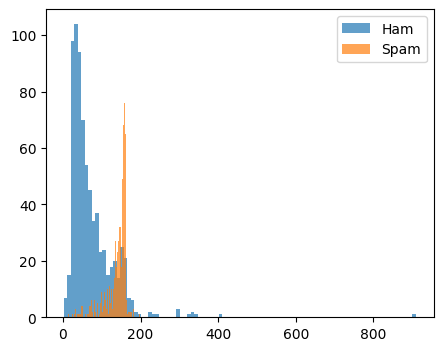

In [62]:
plt.figure(figsize = (5,4))
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

### data preparation

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
data.head(5)

,label,message,length,punct
0,ham,Pls ask macho how much is budget for bb bold 2...,94,6
1,ham,For real tho this sucks. I can't even cook my ...,87,5
2,ham,"That day ü say ü cut ur hair at paragon, is it...",99,3
3,ham,"Shit that is really shocking and scary, cant i...",157,5
4,ham,In other news after hassling me to get him wee...,98,1


In [66]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data['message'])

In [67]:
x = x.toarray()

In [68]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1494, 4553))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [70]:
X_train.shape, X_test.shape

((1195, 4553), (299, 4553))

#### training classifier

In [71]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [72]:
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
y_pred = clf.predict(X_test)

In [74]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 16, 133]])

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       150
        spam       1.00      0.89      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [76]:
# SVM
clf = SVC(C = 1000, gamma = 'auto')

In [77]:
clf.fit(X_train, y_train)

,C,1000
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [78]:
y_pred = clf.predict(X_test)

In [79]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [ 17, 132]])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       150
        spam       0.99      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



In [81]:
# test

def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred